In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder

In [2]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,StackingRegressor 
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# from sklearn import preprocessing 

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [12]:
train_df = pd.read_csv("train_ctrUa4K.csv")
#check the info of the dataset
train_df['Dependents'] = train_df['Dependents'].replace(['3+'],'3')
print(train_df.shape)
train_df.info()
print('-'*30)
# resource_data = pd.read_csv("/content/drive/My Drive/ Deep learning assignments/ LSTM Donors_choose/resources.csv")
# #check the info of the dataset
# resource_data .info()

(614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
------------------------------


In [13]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
test_df = pd.read_csv("test_lAUu6dG.csv")
test_df['Dependents'] = test_df['Dependents'].replace(['3+'],'3')
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].replace([6.0],12.0)
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].replace([350.0],360.0)
#check the info of the dataset
print(test_df.shape)
test_df.info()
print('-'*30)

(367, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
------------------------------


In [15]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.581717,0.825444
std,4910.685399,2334.232099,61.366652,65.076575,0.380150
min,0.000000,0.000000,28.000000,12.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [17]:
num_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount']
# cat_columns=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
cat_columns=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']

# Histogram plots

Plot number :  1


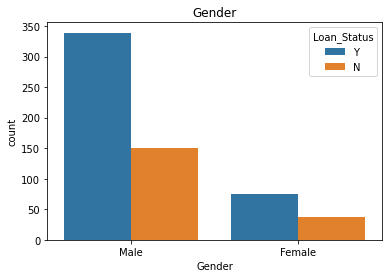

----------------------------------------------------------------------------------------------------
Plot number :  2


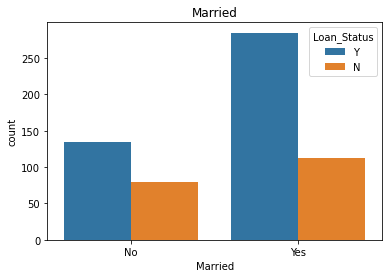

----------------------------------------------------------------------------------------------------
Plot number :  3


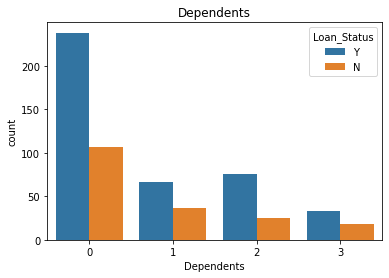

----------------------------------------------------------------------------------------------------
Plot number :  4


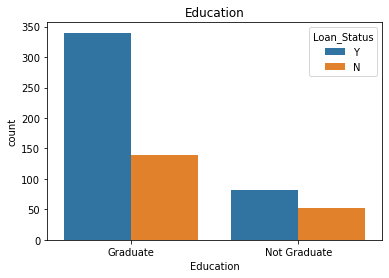

----------------------------------------------------------------------------------------------------
Plot number :  5


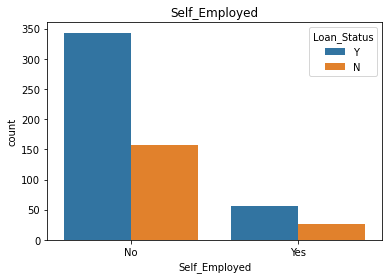

----------------------------------------------------------------------------------------------------
Plot number :  6


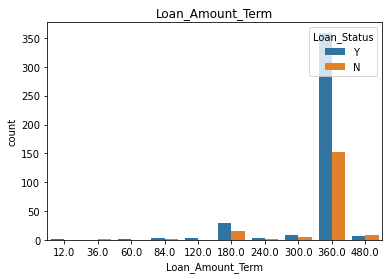

----------------------------------------------------------------------------------------------------
Plot number :  7


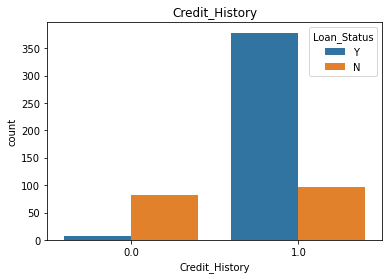

----------------------------------------------------------------------------------------------------
Plot number :  8


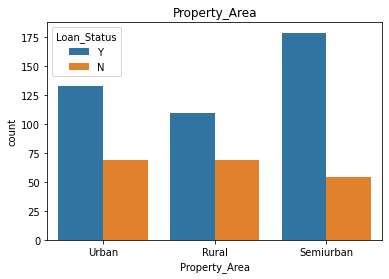

----------------------------------------------------------------------------------------------------


In [36]:
for i in range(len(cat_columns)):
    col=cat_columns[i]
    print('Plot number : ',i+1)
    plt.title(col)
    sns.countplot(data=train_df,x=col,hue='Loan_Status')
    plt.show()
    print('-'*100)

In [28]:
for i in cat_columns:
    print(i)
    print(train_df[i].value_counts()/len(train_df))
    print('-'*5)
    print(test_df[i].value_counts()/len(test_df))
    print('*'*25)

Gender
Male      0.796417
Female    0.182410
Name: Gender, dtype: float64
-----
Male      0.779292
Female    0.190736
Name: Gender, dtype: float64
*************************
Married
Yes    0.648208
No     0.346906
Name: Married, dtype: float64
-----
Yes    0.634877
No     0.365123
Name: Married, dtype: float64
*************************
Dependents
0    0.561889
1    0.166124
2    0.164495
3    0.083062
Name: Dependents, dtype: float64
-----
0    0.544959
2    0.160763
1    0.158038
3    0.108992
Name: Dependents, dtype: float64
*************************
Education
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
-----
Graduate        0.771117
Not Graduate    0.228883
Name: Education, dtype: float64
*************************
Self_Employed
No     0.814332
Yes    0.133550
Name: Self_Employed, dtype: float64
-----
No     0.836512
Yes    0.100817
Name: Self_Employed, dtype: float64
*************************
Loan_Amount_Term
360.0    0.833876
180.0    0.071661
4

# Observations

Distributions of each values in train and test sets are similar.

# Scatter plots

Plot number :  1


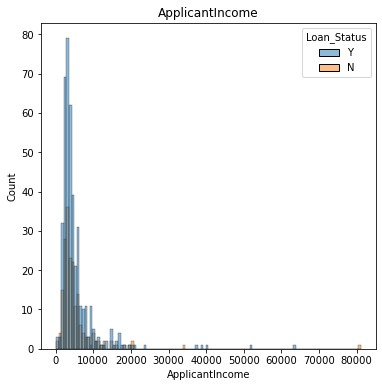

----------------------------------------------------------------------------------------------------
Plot number :  2


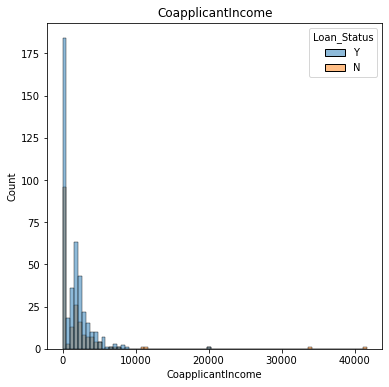

----------------------------------------------------------------------------------------------------
Plot number :  3


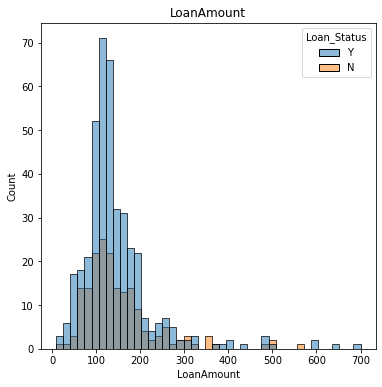

----------------------------------------------------------------------------------------------------


In [31]:
for i in range(len(num_columns)):
    col=num_columns[i]
    print('Plot number : ',i+1)
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  
    ax.set_title(col)
    sns.histplot(data=train_df,x=col,hue='Loan_Status')
    plt.show()
    print('-'*100)

# Observation

1)In Plot number 2 The Coapplicantincome is zero in many rows it might be so because the applicant failed to mention it.Impute with some proper value.

# Boxplots

Plot number :  1


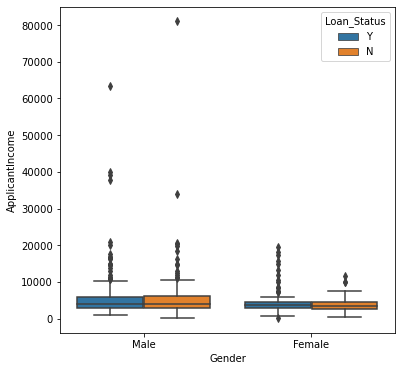

----------------------------------------------------------------------------------------------------
Plot number :  2


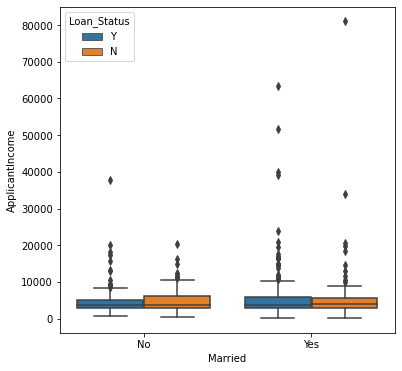

----------------------------------------------------------------------------------------------------
Plot number :  3


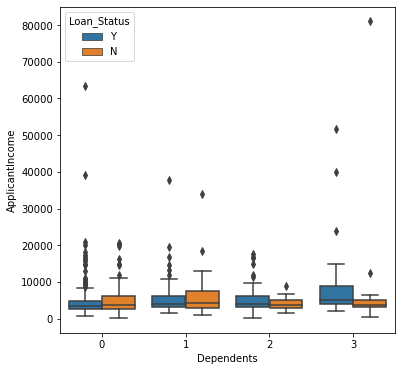

----------------------------------------------------------------------------------------------------
Plot number :  4


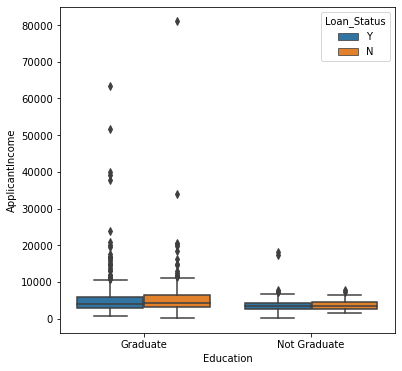

----------------------------------------------------------------------------------------------------
Plot number :  5


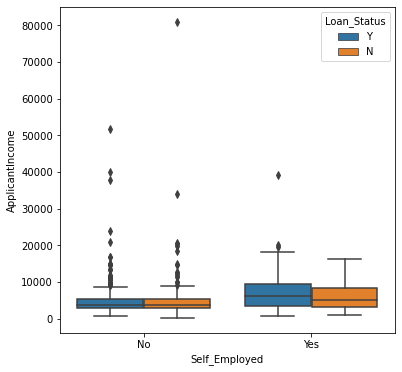

----------------------------------------------------------------------------------------------------
Plot number :  6


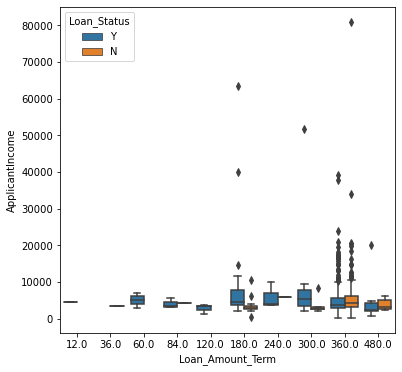

----------------------------------------------------------------------------------------------------
Plot number :  7


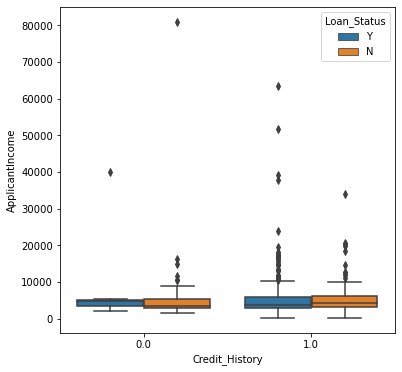

----------------------------------------------------------------------------------------------------
Plot number :  8


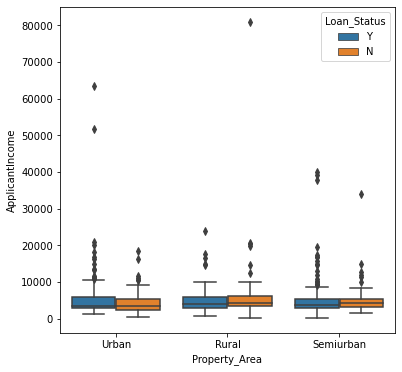

----------------------------------------------------------------------------------------------------


In [68]:
for i in range(len(cat_columns)):
    col=cat_columns[i]
    print('Plot number : ',i+1)
    fig = plt.figure(figsize=(6,6))
    sns.boxplot(data=train_df,x=col,y=num_columns[0],hue=train_df.columns[-1])
    plt.xlabel(col) # Set text for the x axis
    plt.show()
    print('-'*100)

Plot number :  1


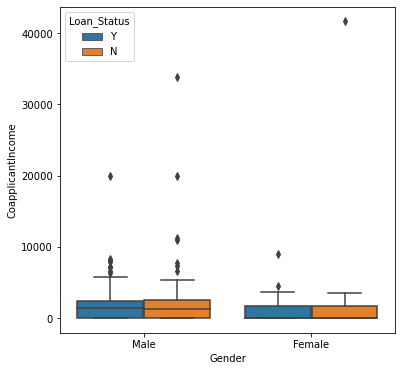

----------------------------------------------------------------------------------------------------
Plot number :  2


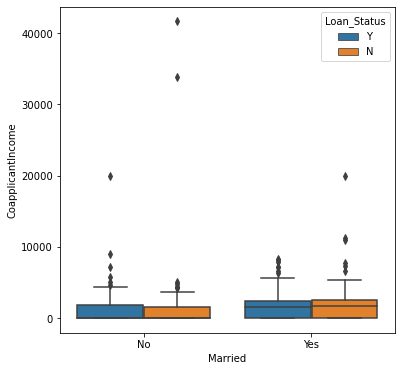

----------------------------------------------------------------------------------------------------
Plot number :  3


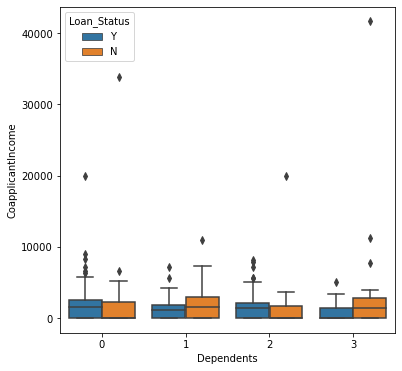

----------------------------------------------------------------------------------------------------
Plot number :  4


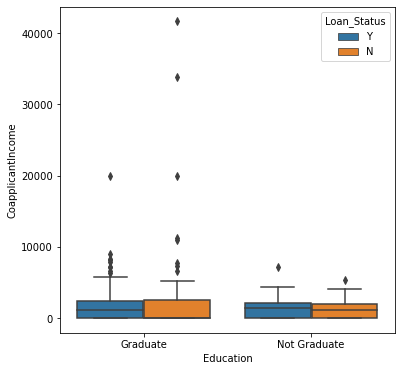

----------------------------------------------------------------------------------------------------
Plot number :  5


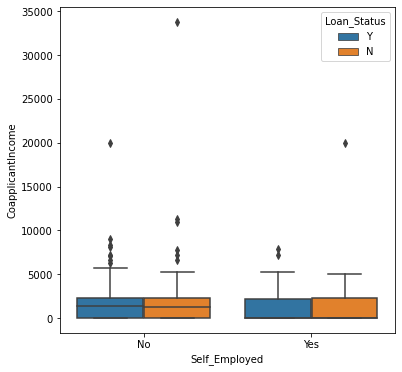

----------------------------------------------------------------------------------------------------
Plot number :  6


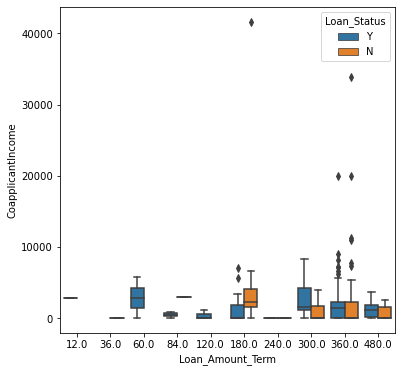

----------------------------------------------------------------------------------------------------
Plot number :  7


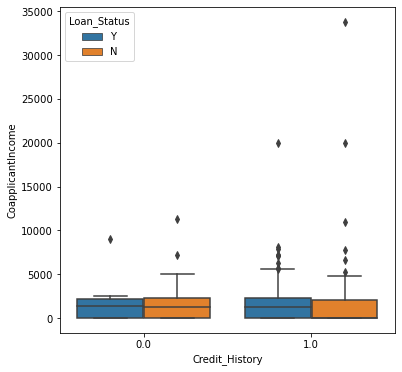

----------------------------------------------------------------------------------------------------
Plot number :  8


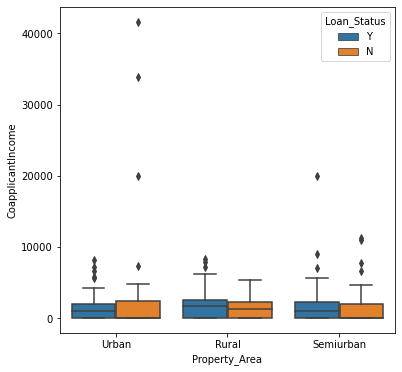

----------------------------------------------------------------------------------------------------


In [69]:
for i in range(len(cat_columns)):
    col=cat_columns[i]
    print('Plot number : ',i+1)
    fig = plt.figure(figsize=(6,6))
    sns.boxplot(data=train_df,x=col,y=num_columns[1],hue=train_df.columns[-1])
    plt.xlabel(col) # Set text for the x axis
    plt.show()
    print('-'*100)

Plot number :  1


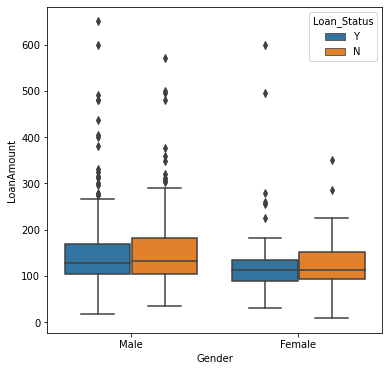

----------------------------------------------------------------------------------------------------
Plot number :  2


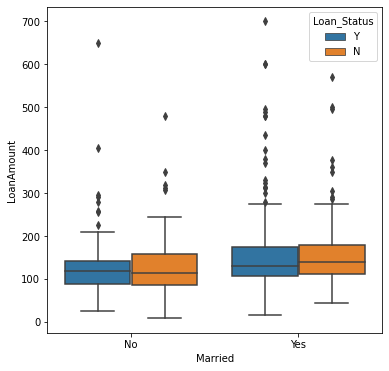

----------------------------------------------------------------------------------------------------
Plot number :  3


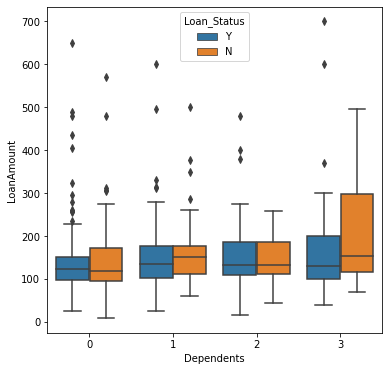

----------------------------------------------------------------------------------------------------
Plot number :  4


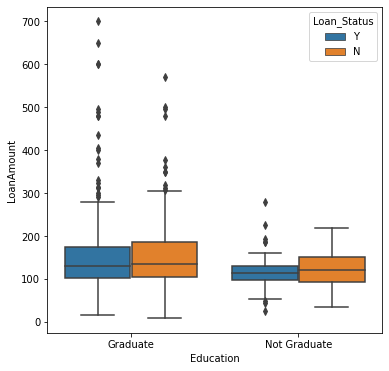

----------------------------------------------------------------------------------------------------
Plot number :  5


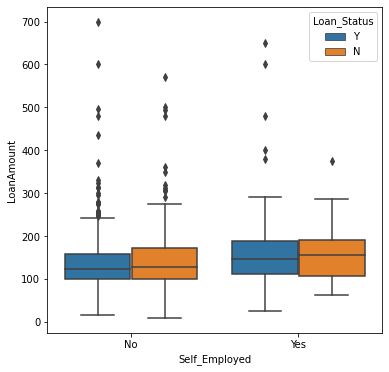

----------------------------------------------------------------------------------------------------
Plot number :  6


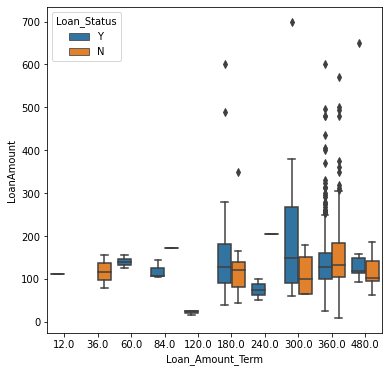

----------------------------------------------------------------------------------------------------
Plot number :  7


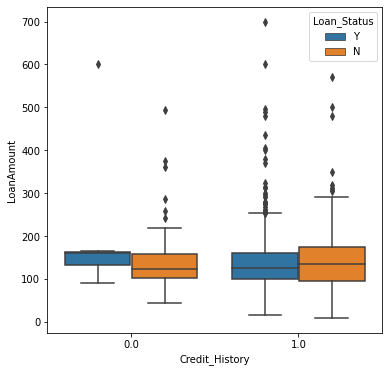

----------------------------------------------------------------------------------------------------
Plot number :  8


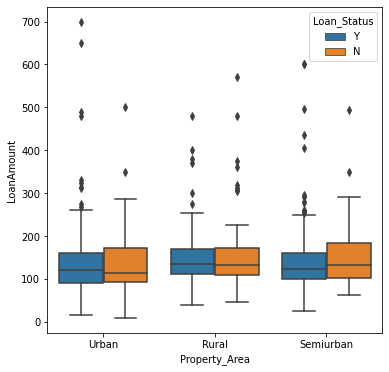

----------------------------------------------------------------------------------------------------


In [70]:
for i in range(len(cat_columns)):
    col=cat_columns[i]
    print('Plot number : ',i+1)
    fig = plt.figure(figsize=(6,6))
    sns.boxplot(data=train_df,x=col,y=num_columns[2],hue=train_df.columns[-1])
    plt.xlabel(col) # Set text for the x axis
    plt.show()
    print('-'*100)

# Violinplots

Plot number :  1


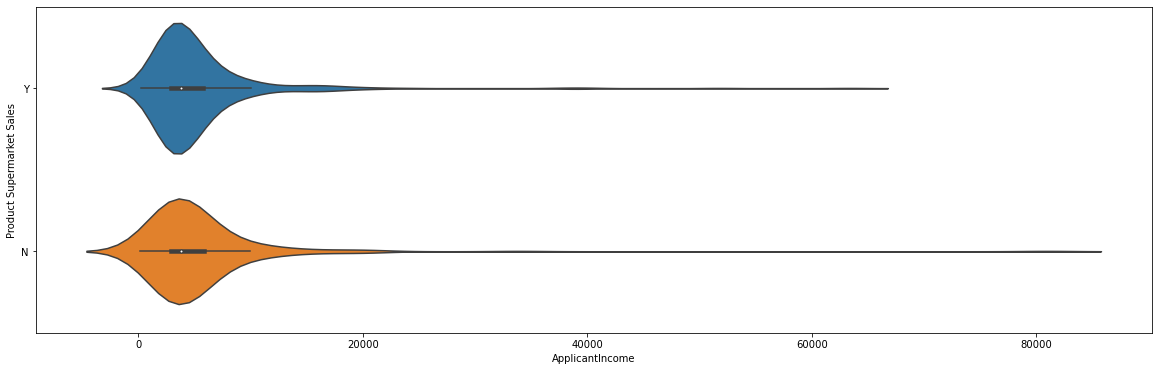

----------------------------------------------------------------------------------------------------
Plot number :  2


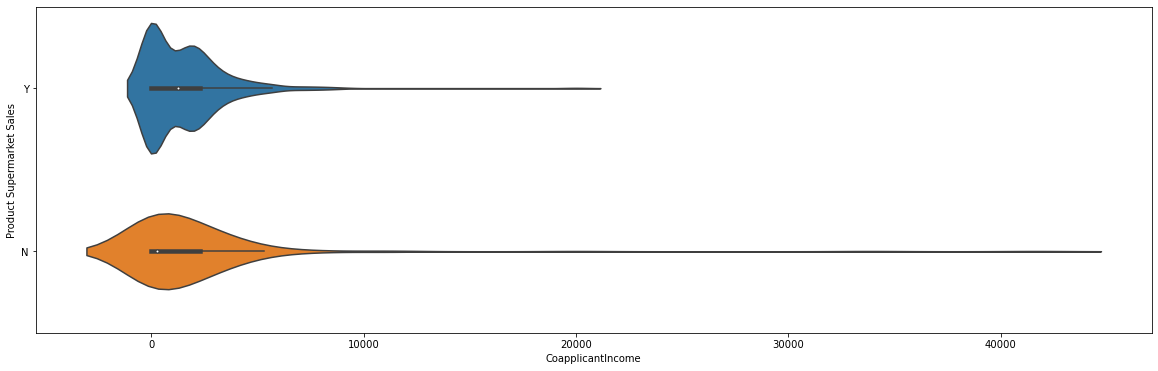

----------------------------------------------------------------------------------------------------
Plot number :  3


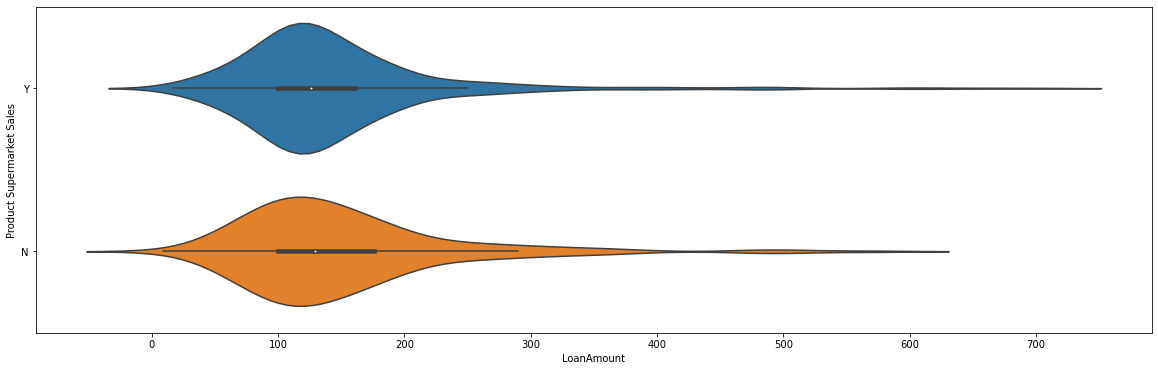

----------------------------------------------------------------------------------------------------


In [66]:
for i in range(len(num_columns)):
    col=num_columns[i]
    print('Plot number : ',i+1)
    fig = plt.figure(figsize=(20,6))
    sns.violinplot(col,train_df.columns[-1], data=train_df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel('Product Supermarket Sales')# Set text for y axis
    plt.show()
    print('-'*100)

# Correlation matrix

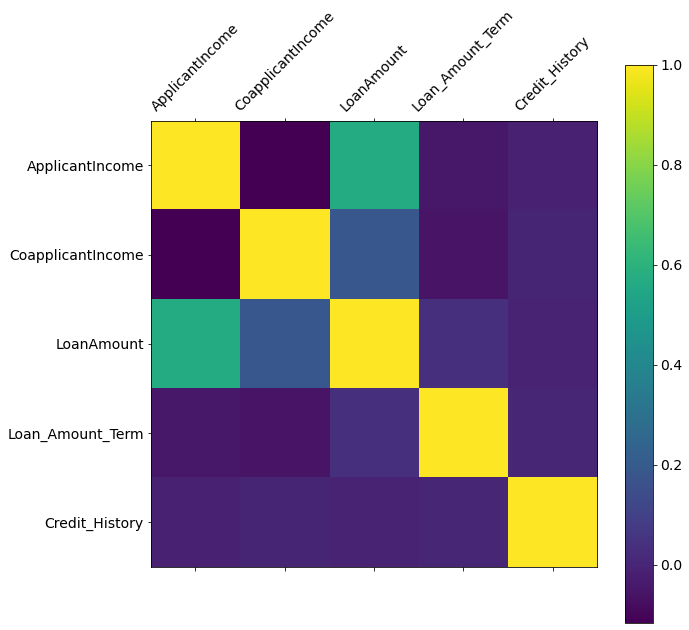

In [40]:
f = plt.figure(figsize=(10, 10))
plt.matshow(train_df.corr(), fignum=f.number)
plt.xticks(range(train_df.select_dtypes(['number']).shape[1]), train_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(train_df.select_dtypes(['number']).shape[1]), train_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# Observation

None of the values are highly correlated with output and Loan_Amount is slightly more correlated  than others.

# Pairplots

Plot number :  1


<Figure size 1440x432 with 0 Axes>

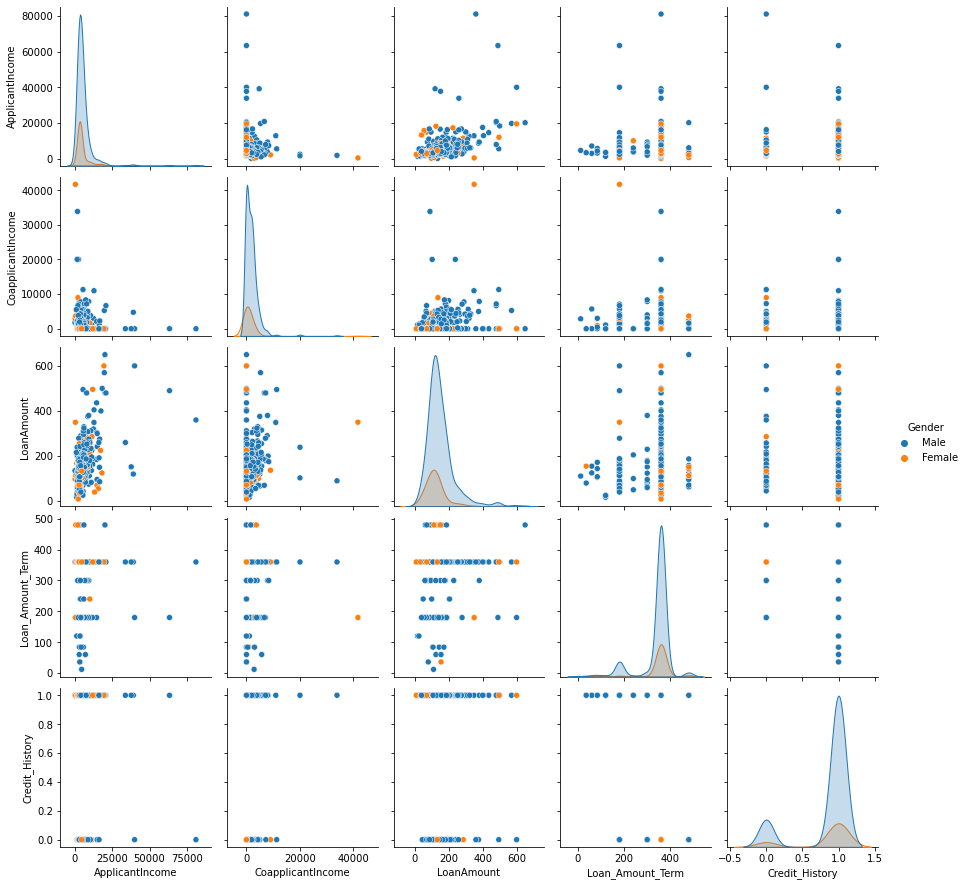

----------------------------------------------------------------------------------------------------
Plot number :  2


<Figure size 1440x432 with 0 Axes>

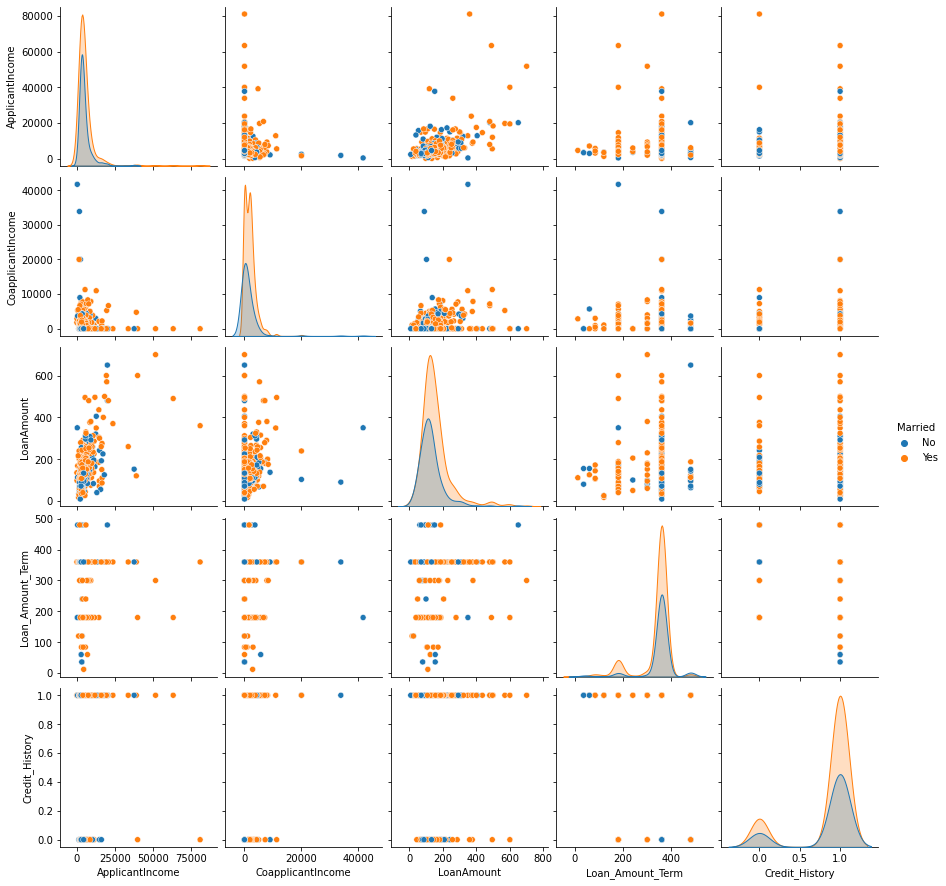

----------------------------------------------------------------------------------------------------
Plot number :  3


<Figure size 1440x432 with 0 Axes>

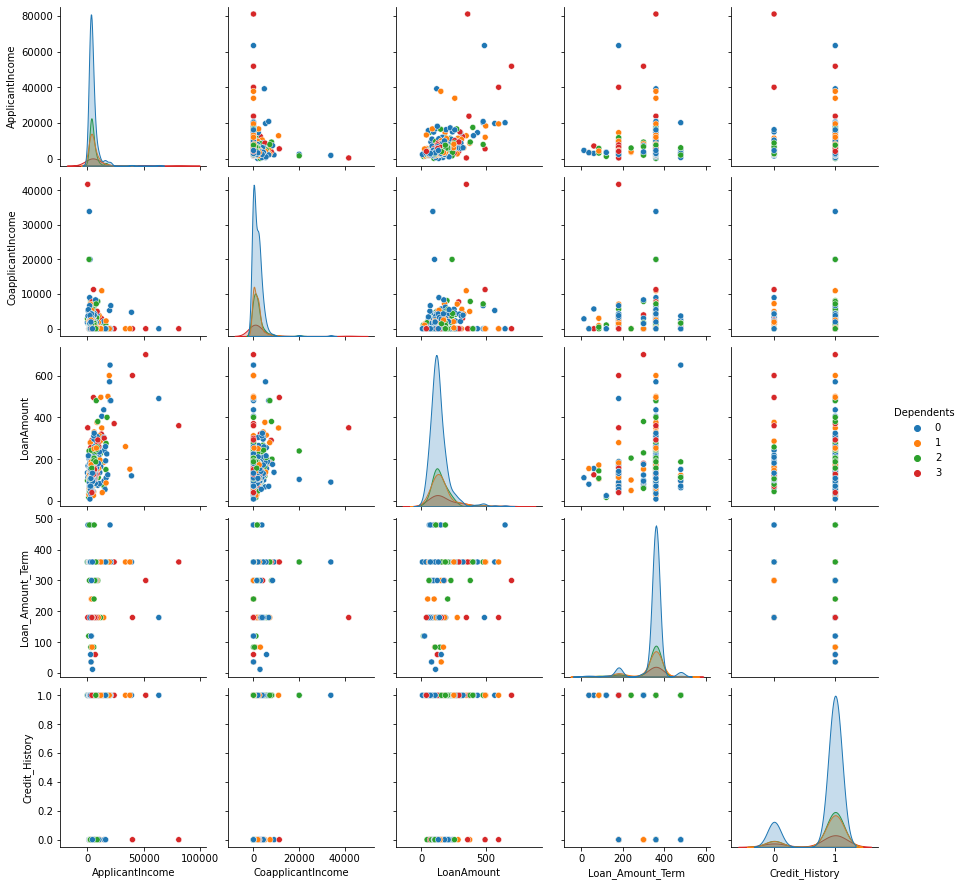

----------------------------------------------------------------------------------------------------
Plot number :  4


<Figure size 1440x432 with 0 Axes>

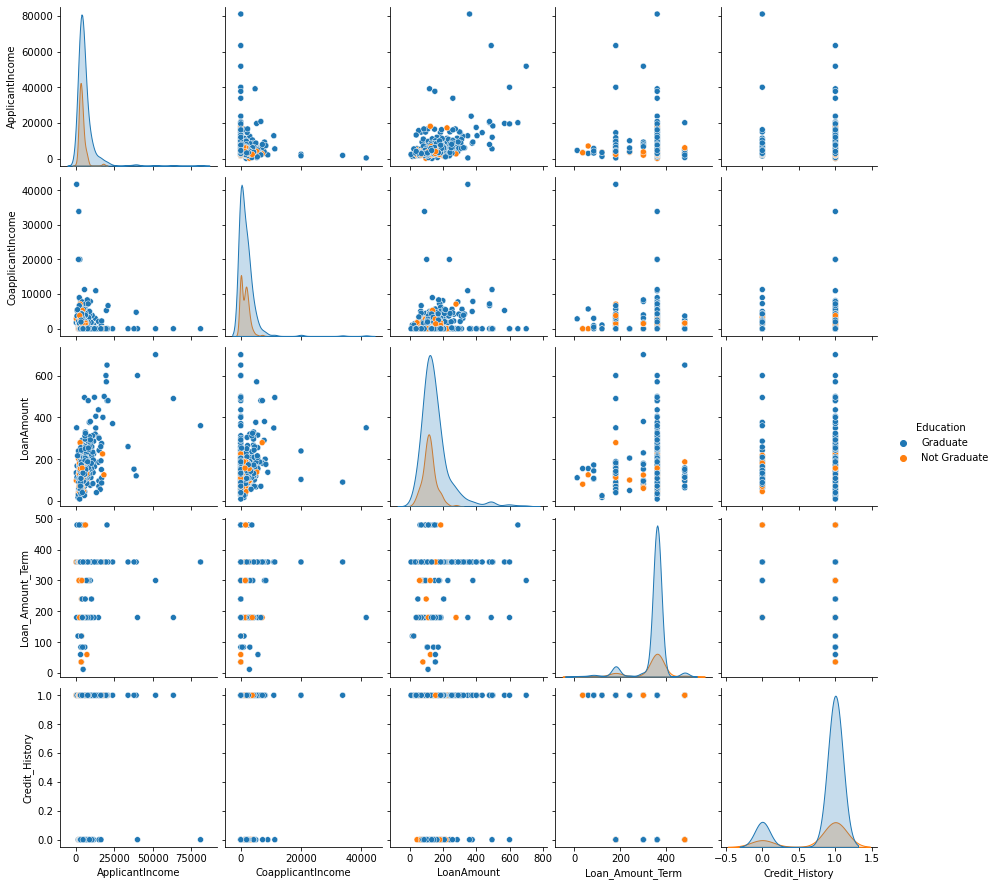

----------------------------------------------------------------------------------------------------
Plot number :  5


<Figure size 1440x432 with 0 Axes>

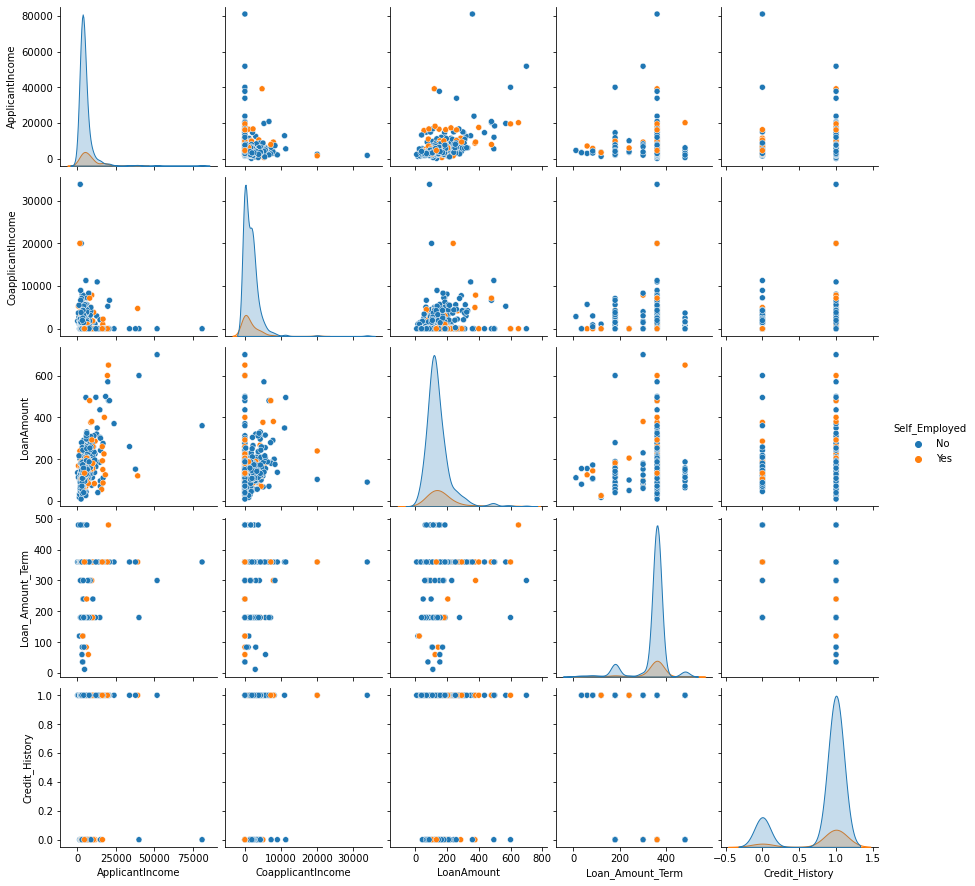

----------------------------------------------------------------------------------------------------
Plot number :  6


<Figure size 1440x432 with 0 Axes>

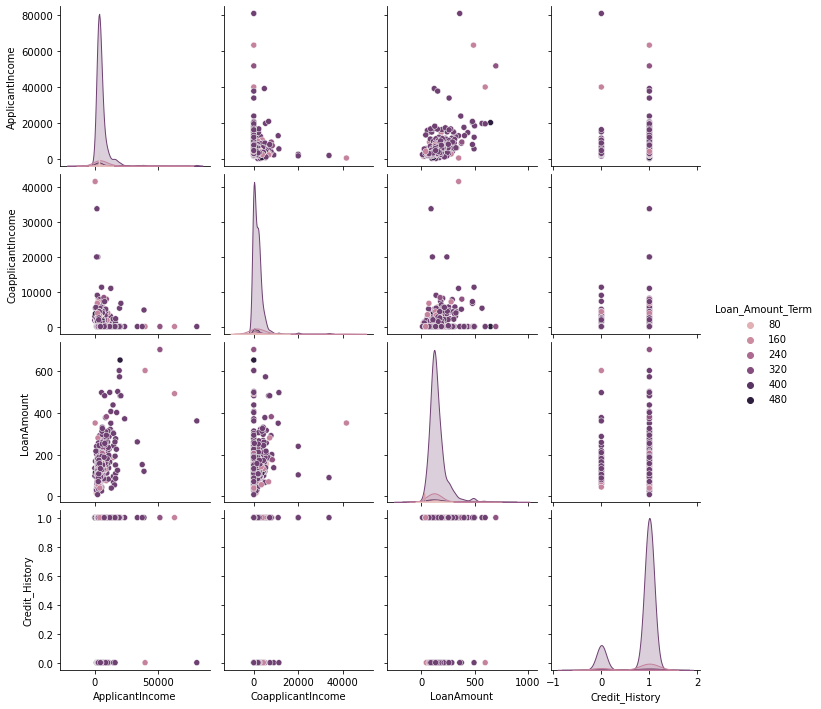

----------------------------------------------------------------------------------------------------
Plot number :  7


<Figure size 1440x432 with 0 Axes>

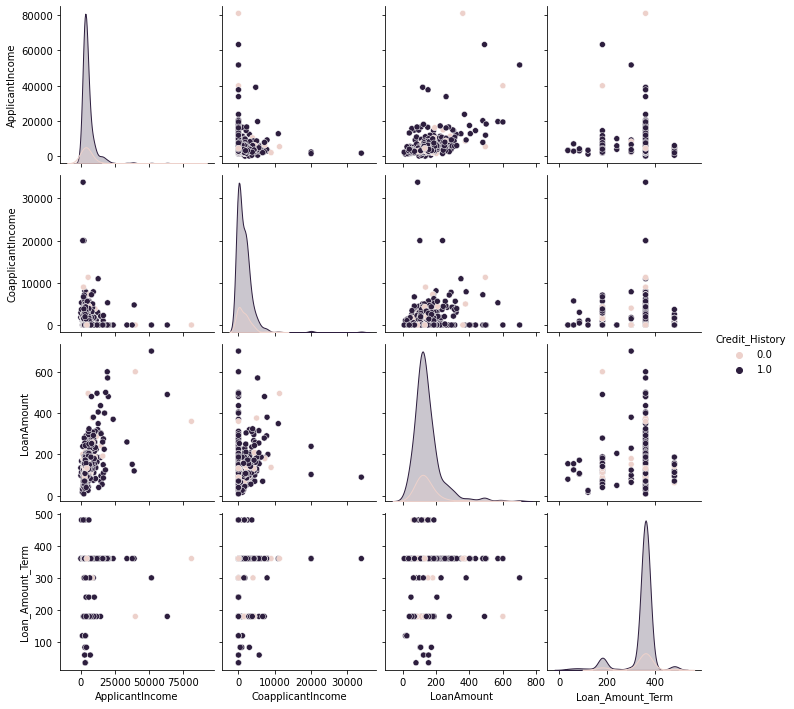

----------------------------------------------------------------------------------------------------
Plot number :  8


<Figure size 1440x432 with 0 Axes>

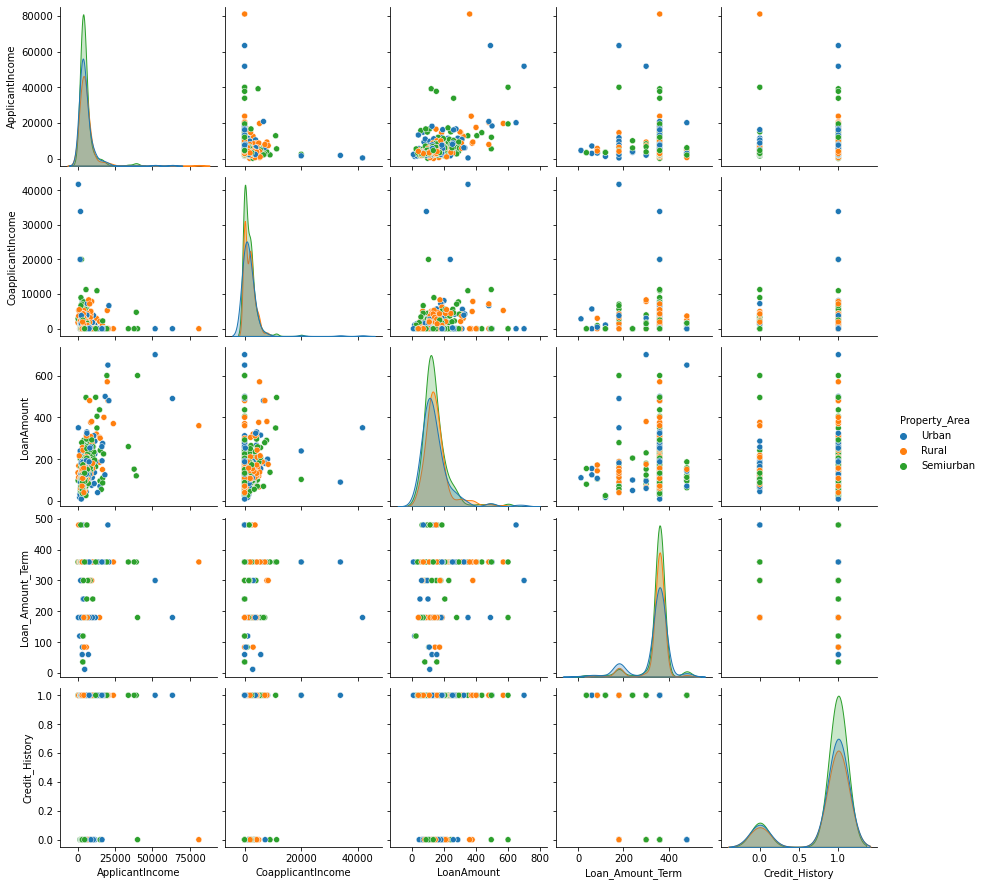

----------------------------------------------------------------------------------------------------


In [41]:
for i in range(len(cat_columns)):
    print('Plot number : ',i+1)
    fig = plt.figure(figsize=(20,6))
    sns.pairplot(train_df,hue=cat_columns[i]) 
    plt.show()
    print('-'*100)

# Null values

In [42]:
nan_columns=[i for i in train_df.columns if train_df[i].isnull().any()]
nan_columns

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [43]:
def nan_values(df,feature):
    nan_rows = df[df[feature].isnull()]
    return nan_rows,len(nan_rows)

In [56]:
for i in nan_columns:
    print(i)
    nan_rows,len_nan_rows=nan_values(train_df,i)
    print(len_nan_rows,'-'*5,len_nan_rows/train_df.shape[0])
    nan_rows1,len_nan_rows1=nan_values(test_df,i)
    print(len_nan_rows1,'-'*5,len_nan_rows1/test_df.shape[0])
    print('_'*20)

Gender
13 ----- 0.021172638436482084
11 ----- 0.02997275204359673
____________________
Married
3 ----- 0.004885993485342019
0 ----- 0.0
____________________
Dependents
15 ----- 0.024429967426710098
10 ----- 0.027247956403269755
____________________
Self_Employed
32 ----- 0.05211726384364821
23 ----- 0.06267029972752043
____________________
LoanAmount
22 ----- 0.035830618892508145
5 ----- 0.013623978201634877
____________________
Loan_Amount_Term
14 ----- 0.02280130293159609
6 ----- 0.01634877384196185
____________________
Credit_History
50 ----- 0.08143322475570032
29 ----- 0.07901907356948229
____________________


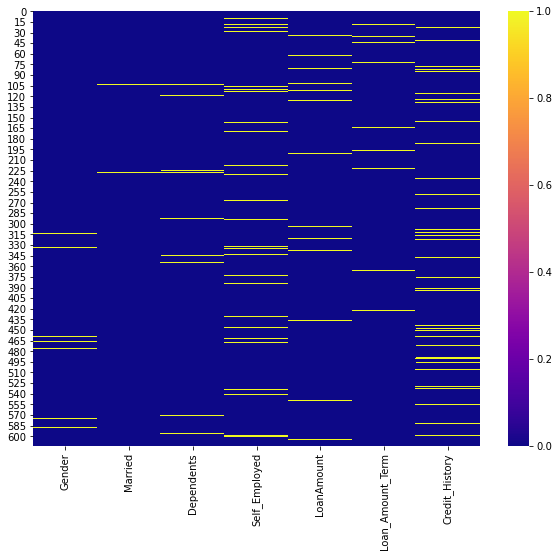

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df[nan_columns].isnull(),cmap='plasma')

def percent_missing(d):
    percentage = pd.DataFrame(100*(d.isnull().sum()/len(d)),columns=['Missing_%']).sort_values('Missing_%',ascending=False)
    return (percentage.head(10))

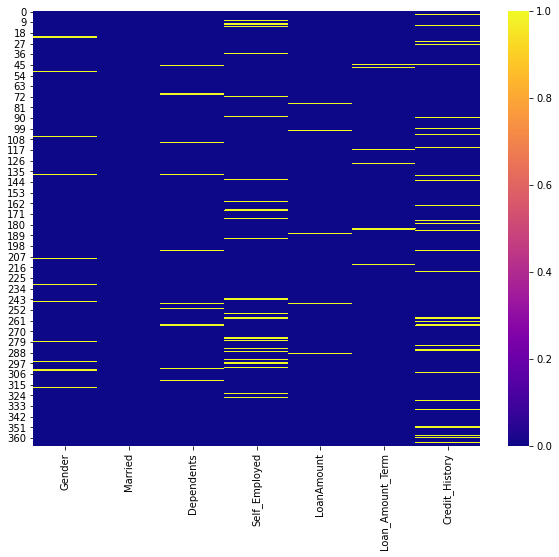

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(test_df[nan_columns].isnull(),cmap='plasma')

def percent_missing(d):
    percentage = pd.DataFrame(100*(d.isnull().sum()/len(d)),columns=['Missing_%']).sort_values('Missing_%',ascending=False)
    return (percentage.head(10))

# Obserations

Though the Null values are not many but the values are not on same rows it is better to impute than to discard. 